In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("max_columns", None)

In [322]:
df = pd.read_csv("new_onlineretail.csv")
df_clusters = pd.read_csv("full_customer_segmentation.csv")
df_clusters_scaled = pd.read_csv("full_customer_segmentation_scaled.csv")

In [323]:
df_clusters_scaled.head()

,Unnamed: 0,AOV,cancelled_mean,customer_id,dbscan_labels,frequency,kmeans_cluster,time_since_last_purchase,unique_products_perc
0,0,0.436137,0.5,12346.0,0,0.004386,0,0.871314,0.423077
1,1,0.503801,0.0,12347.0,1,0.793860,1,0.005362,0.499155
2,2,0.601790,0.0,12348.0,2,0.131579,2,0.201072,0.665012
3,3,0.504929,0.0,12349.0,2,0.315789,2,0.048257,1.000000
4,4,0.492342,0.0,12350.0,0,0.070175,0,0.831099,1.000000


In [324]:
df_clusters = df_clusters.drop("Unnamed: 0", axis = 1)
df = df.drop("Unnamed: 0", axis = 1)
df_clusters_scaled = df_clusters_scaled.drop("Unnamed: 0", axis = 1)

In [325]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,revenue,discount,Continent,damaged,Date,Time,time_since
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.0,15.30,0,Europe,0,2010-12-01,08:26:00,373.0
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0,20.34,0,Europe,0,2010-12-01,08:26:00,373.0
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0.0,22.00,0,Europe,0,2010-12-01,08:26:00,373.0
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0,20.34,0,Europe,0,2010-12-01,08:26:00,373.0
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0,20.34,0,Europe,0,2010-12-01,08:26:00,373.0


In [326]:
df_clusters.head()

,AOV,cancelled_mean,customer_id,dbscan_labels,frequency,kmeans_cluster,time_since_last_purchase,unique_products_perc
0,0.436137,0.5,12346.0,0,0.004386,0,0.871314,0.423077
1,0.503801,0.0,12347.0,1,0.793860,1,0.005362,0.499155
2,0.601790,0.0,12348.0,2,0.131579,2,0.201072,0.665012
3,0.504929,0.0,12349.0,2,0.315789,2,0.048257,1.000000
4,0.492342,0.0,12350.0,0,0.070175,0,0.831099,1.000000


In [327]:
df_clusters_scaled.head()

,AOV,cancelled_mean,customer_id,dbscan_labels,frequency,kmeans_cluster,time_since_last_purchase,unique_products_perc
0,0.436137,0.5,12346.0,0,0.004386,0,0.871314,0.423077
1,0.503801,0.0,12347.0,1,0.793860,1,0.005362,0.499155
2,0.601790,0.0,12348.0,2,0.131579,2,0.201072,0.665012
3,0.504929,0.0,12349.0,2,0.315789,2,0.048257,1.000000
4,0.492342,0.0,12350.0,0,0.070175,0,0.831099,1.000000


In [328]:
# get customers id from clusters
# some customers are not there because they were removed as outliers
# make it a dictionary where key = cid and val = cluster id

cid_clusters_dict = {}
for i in range(len(df_clusters)):
    cid_clusters_dict[df_clusters.loc[i,'customer_id']] = df_clusters.loc[i,'dbscan_labels']

In [329]:
len(cid_clusters_dict)

4372

In [330]:
# get complete customers id list from original data
# duplicates should be allowed in order
# as we want the cluster_id to be filled in for each of the row

cid_original = df.CustomerID.tolist()

In [331]:
# create a new list where:
# 1. loops through each original customer id
# 2. checks whether or not that id is in cid_clusters
# 3. if it is, then get the value corresponding to the id
# 4. if not, then mark as 'outlier'

clusters_mapping = [cid_clusters_dict[i] if i in cid_clusters_dict else 'outlier' for i in cid_original]

In [332]:
clusters_mapping[:10]

['outlier',
 'outlier',
 'outlier',
 'outlier',
 'outlier',
 'outlier',
 'outlier',
 'outlier',
 'outlier',
 '1']

In [333]:
df['cluster'] = clusters_mapping

In [334]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,revenue,discount,Continent,damaged,Date,Time,time_since,cluster
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.0,15.30,0,Europe,0,2010-12-01,08:26:00,373.0,outlier
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0,20.34,0,Europe,0,2010-12-01,08:26:00,373.0,outlier
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0.0,22.00,0,Europe,0,2010-12-01,08:26:00,373.0,outlier
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0,20.34,0,Europe,0,2010-12-01,08:26:00,373.0,outlier
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0,20.34,0,Europe,0,2010-12-01,08:26:00,373.0,outlier
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0.0,15.30,0,Europe,0,2010-12-01,08:26:00,373.0,outlier
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0.0,25.50,0,Europe,0,2010-12-01,08:26:00,373.0,outlier
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0.0,11.10,0,Europe,0,2010-12-01,08:28:00,373.0,outlier
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0.0,11.10,0,Europe,0,2010-12-01,08:28:00,373.0,outlier
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0.0,54.08,0,Europe,0,2010-12-01,08:34:00,373.0,1


In [335]:
df_outliers = df[df.cluster == 'outlier']
df_segmented = df[df.cluster != 'outlier']

In [336]:
print(df_segmented.info())
print('\n')
print(df_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218243 entries, 9 to 406828
Data columns (total 17 columns):
InvoiceNo      218243 non-null object
StockCode      218243 non-null object
Description    218243 non-null object
Quantity       218243 non-null int64
InvoiceDate    218243 non-null object
UnitPrice      218243 non-null float64
CustomerID     218243 non-null float64
Country        218243 non-null object
cancelled      218243 non-null float64
revenue        218243 non-null float64
discount       218243 non-null int64
Continent      218243 non-null object
damaged        218243 non-null int64
Date           218243 non-null object
Time           218243 non-null object
time_since     218243 non-null float64
cluster        218243 non-null object
dtypes: float64(5), int64(3), object(9)
memory usage: 30.0+ MB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 188586 entries, 0 to 406813
Data columns (total 17 columns):
InvoiceNo      188586 non-null object
StockCode      188586 

In [337]:
df_segmented.cluster.value_counts()

1    122392
2     71979
0     23872
Name: cluster, dtype: int64

In [338]:
# divide by groups
cluster_1 = df_segmented[df_segmented.cluster == '0']
cluster_2 = df_segmented[df_segmented.cluster == '1']
cluster_3 = df_segmented[df_segmented.cluster == '2']
outliers = df_outliers.copy()

cluster_1_rfm = df_clusters[df_clusters.dbscan_labels == "0"]
cluster_2_rfm = df_clusters[df_clusters.dbscan_labels == "1"]
cluster_3_rfm = df_clusters[df_clusters.dbscan_labels == "2"]
outliers_rfm = df_clusters[df_clusters.dbscan_labels == 'outlier']

cluster_1_rfm_scaled = df_clusters_scaled[df_clusters_scaled.dbscan_labels == '0']
cluster_2_rfm_scaled = df_clusters_scaled[df_clusters_scaled.dbscan_labels == '1']
cluster_3_rfm_scaled = df_clusters_scaled[df_clusters_scaled.dbscan_labels == '2']
outliers_rfm_scaled = df_clusters_scaled[df_clusters_scaled.dbscan_labels == 'outlier']

## Profiling the segmentation 1: clustering variables

In [339]:
# using the rfm dataset, 
# view how each of the cluster variables have been segmented

In [340]:
df_clusters.columns

Index(['AOV', 'cancelled_mean', 'customer_id', 'dbscan_labels', 'frequency',
       'kmeans_cluster', 'time_since_last_purchase', 'unique_products_perc'],
      dtype='object')

In [341]:
# radar chart practice
from math import pi

# set data
cat = ['Speed', 'Relability', 'Comfort', 'Safety', 'Efficiency']
values = [90,60,65,70,40]

N = len(cat)

# dividing the circle starting location by the number of categories
x_as = [n / float(N) * 2 * pi for n in range(N)]
x_as

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669]

In [342]:
# chart is circular -> append a copy of the first value
# of each list a the end of each list with data
values += values[:1]
x_as += x_as[:1]

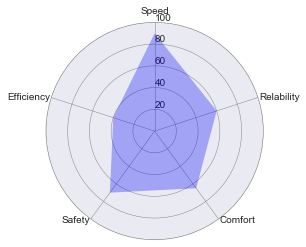

In [343]:
# set color of axes
plt.rc('axes', linewidth = 0.5, edgecolor = "#888888")

# create polar plot
ax = plt.subplot(111, polar = True)

# set clockwise rotation
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# set position of y-labels
ax.set_rlabel_position(0)

# set color and linestyle of grid
ax.xaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)
ax.yaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)

# set number of radial axes and remove labels
plt.xticks(x_as[:-1],[])

# set yticks
plt.yticks([20,40,60,80,100], ["20","40","60", "80", "100"])

# plot actual data
ax.plot(x_as, values, linewidth = 0, linestyle = 'solid', zorder = 3)

# fill area
ax.fill(x_as, values, 'b', alpha = 0.3)

# set axis limit
ax.set_ylim(0,100)

# draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


# Show polar plot
plt.show()

In [344]:
features = ['AOV', 'cancelled_mean','frequency',
           'time_since_last_purchase',
           'unique_products_perc']

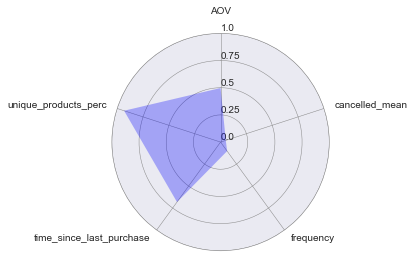

In [345]:
# cluster 1 radar chart

# get mean values for each variable
mean_values = cluster_1_rfm_scaled[features].apply(lambda x: np.mean(x)).values.tolist()

N = len(cat_labels)
x_as = [n / float(N) * pi * 2 for n in range(N)]

mean_values += mean_values[:1]
x_as += x_as[:1]

# set color of axes
plt.rc('axes', linewidth = 0.5, edgecolor = "#888888")

# create polar plot
ax = plt.subplot(111, polar = True)

# set clockwise rotation
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# set position of y-labels
ax.set_rlabel_position(0)

# set color and linestyle of grid
ax.xaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)
ax.yaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)

# set number of radial axes and remove labels
plt.xticks(x_as[:-1],[])

# set yticks
y_ticks_setting = np.linspace(0,1, num = 5)
plt.yticks(y_ticks_setting, y_ticks_setting.astype(str))

# plot actual data
ax.plot(x_as, mean_values, linewidth = 0, linestyle = 'solid', zorder = 3)

# fill area
ax.fill(x_as, mean_values, 'b', alpha = 0.3)

# set axis limit
ax.set_ylim(0,1)

# draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 1.1
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 0.1 + distance_ax, 
            cat_labels[i], size=10, 
            horizontalalignment=ha, 
            verticalalignment="center")

# Show polar plot
plt.show()

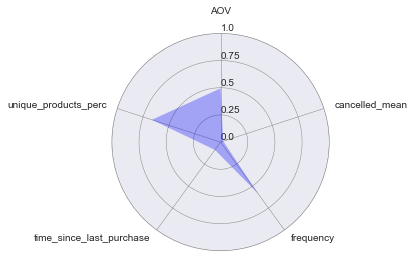

In [346]:
# cluster 2 radar chart

# get mean values for each variable
mean_values = cluster_2_rfm_scaled[features].apply(lambda x: np.mean(x)).values.tolist()

N = len(cat_labels)
x_as = [n / float(N) * pi * 2 for n in range(N)]

mean_values += mean_values[:1]
x_as += x_as[:1]

# set color of axes
plt.rc('axes', linewidth = 0.5, edgecolor = "#888888")

# create polar plot
ax = plt.subplot(111, polar = True)

# set clockwise rotation
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# set position of y-labels
ax.set_rlabel_position(0)

# set color and linestyle of grid
ax.xaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)
ax.yaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)

# set number of radial axes and remove labels
plt.xticks(x_as[:-1],[])

# set yticks
y_ticks_setting = np.linspace(0,1, num = 5)
plt.yticks(y_ticks_setting, y_ticks_setting.astype(str))

# plot actual data
ax.plot(x_as, mean_values, linewidth = 0, linestyle = 'solid', zorder = 3)

# fill area
ax.fill(x_as, mean_values, 'b', alpha = 0.3)

# set axis limit
ax.set_ylim(0,1)

# draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 1.1
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 0.1 + distance_ax, 
            cat_labels[i], size=10, 
            horizontalalignment=ha, 
            verticalalignment="center")

# Show polar plot
plt.show()

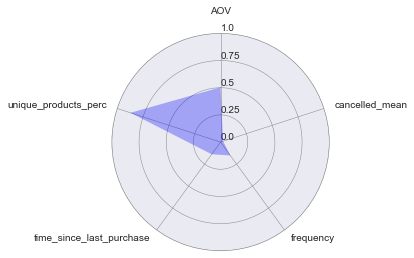

In [347]:
# cluster 3 radar chart

# get mean values for each variable
mean_values = cluster_3_rfm_scaled[features].apply(lambda x: np.mean(x)).values.tolist()

N = len(cat_labels)
x_as = [n / float(N) * pi * 2 for n in range(N)]

mean_values += mean_values[:1]
x_as += x_as[:1]

# set color of axes
plt.rc('axes', linewidth = 0.5, edgecolor = "#888888")

# create polar plot
ax = plt.subplot(111, polar = True)

# set clockwise rotation
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# set position of y-labels
ax.set_rlabel_position(0)

# set color and linestyle of grid
ax.xaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)
ax.yaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)

# set number of radial axes and remove labels
plt.xticks(x_as[:-1],[])

# set yticks
y_ticks_setting = np.linspace(0,1, num = 5)
plt.yticks(y_ticks_setting, y_ticks_setting.astype(str))

# plot actual data
ax.plot(x_as, mean_values, linewidth = 0, linestyle = 'solid', zorder = 3)

# fill area
ax.fill(x_as, mean_values, 'b', alpha = 0.3)

# set axis limit
ax.set_ylim(0,1)

# draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 1.1
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 0.1 + distance_ax, 
            cat_labels[i], size=10, 
            horizontalalignment=ha, 
            verticalalignment="center")

# Show polar plot
plt.show()

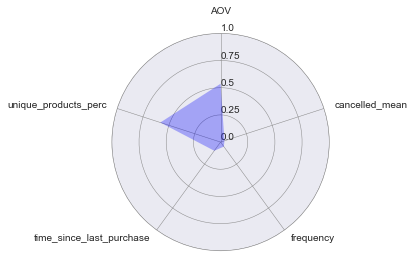

In [348]:
# outliers radar chart

# get mean values for each variable
mean_values = outliers_rfm_scaled[features].apply(lambda x: np.mean(x)).values.tolist()

N = len(cat_labels)
x_as = [n / float(N) * pi * 2 for n in range(N)]

mean_values += mean_values[:1]
x_as += x_as[:1]

# set color of axes
plt.rc('axes', linewidth = 0.5, edgecolor = "#888888")

# create polar plot
ax = plt.subplot(111, polar = True)

# set clockwise rotation
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# set position of y-labels
ax.set_rlabel_position(0)

# set color and linestyle of grid
ax.xaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)
ax.yaxis.grid(True, color = "#888888", linestyle = 'solid',
             linewidth = 0.5)

# set number of radial axes and remove labels
plt.xticks(x_as[:-1],[])

# set yticks
y_ticks_setting = np.linspace(0,1, num = 5)
plt.yticks(y_ticks_setting, y_ticks_setting.astype(str))

# plot actual data
ax.plot(x_as, mean_values, linewidth = 0, linestyle = 'solid', zorder = 3)

# fill area
ax.fill(x_as, mean_values, 'b', alpha = 0.3)

# set axis limit
ax.set_ylim(0,1)

# draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 1.1
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 0.1 + distance_ax, 
            cat_labels[i], size=10, 
            horizontalalignment=ha, 
            verticalalignment="center")

# Show polar plot
plt.show()

### in general

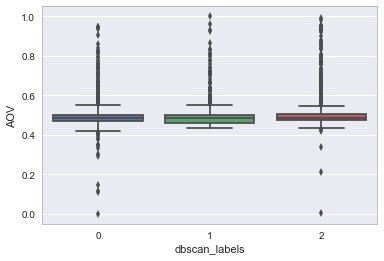

In [349]:
# AOV
sns.boxplot(data = df_clusters[df_clusters.dbscan_labels != 'outlier'],
           x = 'dbscan_labels',
           y = 'AOV')

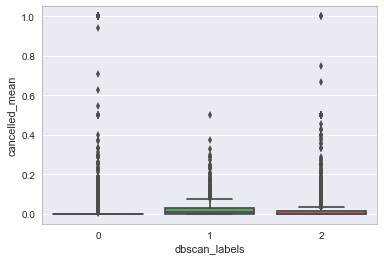

In [350]:
# cancelled_mean
sns.boxplot(data = df_clusters[df_clusters.dbscan_labels != 'outlier'],
           x = 'dbscan_labels',
           y = 'cancelled_mean')

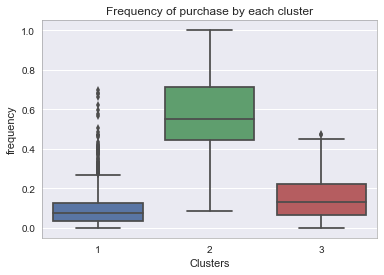

In [402]:
# frequency
sns.boxplot(data = df_clusters[df_clusters.dbscan_labels != 'outlier'],
           x = 'dbscan_labels',
           y = 'frequency')
plt.xlabel("Clusters")
plt.xticks([0,1,2], [1,2,3])
plt.title("Frequency of purchase by each cluster")
plt.show()

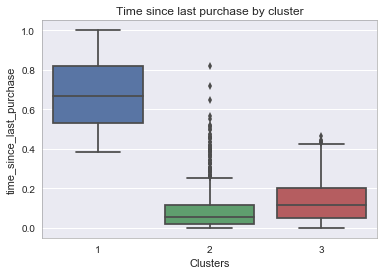

In [406]:
# time_since_last_purchase
sns.boxplot(data = df_clusters[df_clusters.dbscan_labels != 'outlier'],
           x = 'dbscan_labels',
           y = 'time_since_last_purchase')
plt.xlabel("Clusters")
plt.xticks([0,1,2], [1,2,3])
plt.title("Time since last purchase by cluster")
plt.show()

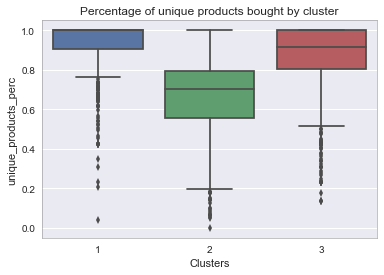

In [405]:
# time_since_last_purchase
sns.boxplot(data = df_clusters[df_clusters.dbscan_labels != 'outlier'],
           x = 'dbscan_labels',
           y = 'unique_products_perc')
plt.xlabel("Clusters")
plt.xticks([0,1,2], [1,2,3])
plt.title("Percentage of unique products bought by cluster")
plt.show()

## more values

In [354]:
# reindex
df_clusters.index = df_clusters.customer_id

total_revenue = df.groupby(by = 'CustomerID')['revenue'].sum()
total_revenue.head()

min_spent = df.groupby(by = 'CustomerID')['revenue'].min()
max_spent = df.groupby(by = 'CustomerID')['revenue'].max()
median_spent = df.groupby(by = 'CustomerID')['revenue'].median()

mean_quantity = df.groupby(by = 'CustomerID')['Quantity'].mean()
median_quantity = df.groupby(by = 'CustomerID')['Quantity'].median()
max_quantity = df.groupby(by = 'CustomerID')['Quantity'].max()
min_quantity = df.groupby(by = 'CustomerID')['Quantity'].min()

cancelled_num = df.groupby(by = 'CustomerID')['cancelled'].sum()

time_since_first_purchase = df.groupby(by = 'CustomerID')['time_since'].max()

In [464]:
df_clusters['tot_revenue'] = total_revenue
df_clusters['min_spent'] = min_spent
df_clusters['max_spent'] = max_spent
df_clusters['median_spent'] = median_spent
df_clusters['mean_quantity'] = mean_quantity
df_clusters['median_quantity'] = median_quantity
df_clusters['max_quantity'] = max_quantity
df_clusters['min_quantity'] = min_quantity
df_clusters['tot_cancelled'] = cancelled_num
df_clusters['time_since_first_purchase'] = time_since_first_purchase
df_clusters['time_as_customer'] = df_clusters.time_since_first_purchase - df_clusters.time_since_last_purchase

In [465]:
df_clusters.head()

,AOV,cancelled_mean,customer_id,dbscan_labels,frequency,kmeans_cluster,time_since_last_purchase,unique_products_perc,tot_revenue,min_spent,max_spent,median_spent,mean_quantity,median_quantity,max_quantity,min_quantity,tot_cancelled,time_since_first_purchase,time_as_customer
customer_id,,,,,,,,,,,,,,,,,,,
12346.0,0.436137,0.5,12346.0,0,0.004386,0,0.871314,0.423077,0.00,-77183.60,77183.6,0.00,0.000000,0.0,74215,-74215,1.0,325.0,324.128686
12347.0,0.503801,0.0,12347.0,1,0.793860,1,0.005362,0.499155,4310.00,5.04,249.6,17.00,13.505495,12.0,240,2,0.0,367.0,366.994638
12348.0,0.601790,0.0,12348.0,2,0.131579,2,0.201072,0.665012,1797.24,13.20,240.0,41.76,75.516129,72.0,144,1,0.0,358.0,357.798928
12349.0,0.504929,0.0,12349.0,2,0.315789,2,0.048257,1.000000,1757.55,6.64,300.0,17.70,8.643836,6.0,36,1,0.0,18.0,17.951743
12350.0,0.492342,0.0,12350.0,0,0.070175,0,0.831099,1.000000,334.40,8.50,40.0,19.80,11.588235,12.0,24,1,0.0,310.0,309.168901


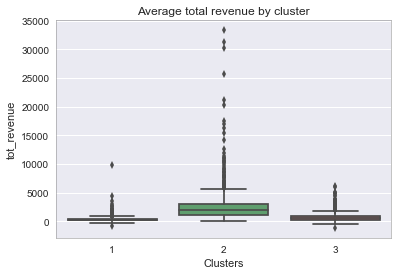

In [407]:
# total revenue
sns.boxplot(data = df_clusters[df_clusters.dbscan_labels != 'outlier'],
           x = 'dbscan_labels',
           y = 'tot_revenue')
plt.xlabel("Clusters")
plt.xticks([0,1,2], [1,2,3])
plt.title("Average total revenue by cluster")
plt.show()

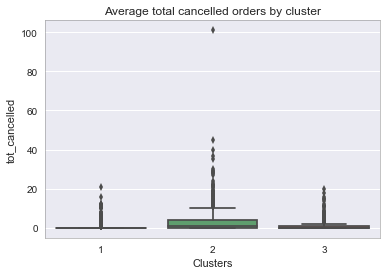

In [408]:
# total cancelled num
sns.boxplot(data = df_clusters[df_clusters.dbscan_labels != 'outlier'],
           x = 'dbscan_labels',
           y = 'tot_cancelled')
plt.xlabel("Clusters")
plt.xticks([0,1,2], [1,2,3])
plt.title("Average total cancelled orders by cluster")
plt.show()

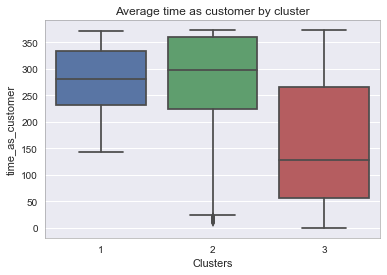

In [466]:
# time as customer
sns.boxplot(data = df_clusters[df_clusters.dbscan_labels != 'outlier'],
           x = 'dbscan_labels',
           y = 'time_as_customer')
plt.xlabel("Clusters")
plt.xticks([0,1,2], [1,2,3])
plt.title("Average time as customer by cluster")
plt.show()

## Profiling the segmentation 2: profiling variables

Dataframes


cluster_1
cluster_2
cluster_3
outliers

cluster_1_rfm 
cluster_2_rfm 
cluster_3_rfm 
outliers_rfm 

cluster_1_rfm_scaled 
cluster_2_rfm_scaled 
cluster_3_rfm_scaled 
outliers_rfm_scaled 

In [380]:
cluster_1.Country.value_counts() / len(cluster_1)

United Kingdom          0.903778
Germany                 0.026852
France                  0.013740
Belgium                 0.007456
Switzerland             0.006954
Portugal                0.005152
Italy                   0.004943
Spain                   0.003728
Japan                   0.003226
Unspecified             0.002346
Greece                  0.002262
Austria                 0.002178
Netherlands             0.002053
Lebanon                 0.001885
Australia               0.001676
Cyprus                  0.001466
Lithuania               0.001466
Brazil                  0.001340
United Arab Emirates    0.001257
Channel Islands         0.001131
USA                     0.000922
Sweden                  0.000922
Finland                 0.000922
Bahrain                 0.000712
Norway                  0.000712
Saudi Arabia            0.000419
Canada                  0.000419
Israel                  0.000084
Name: Country, dtype: float64

In [383]:
cluster_1.Continent.value_counts() / len(cluster_1)

Europe           0.986134
Middle East      0.003938
Asia             0.003226
Unspecified      0.002346
Oceania          0.001676
North America    0.001340
South America    0.001340
Name: Continent, dtype: float64

In [384]:
cluster_2.Country.value_counts() / len(cluster_2)

United Kingdom     0.900549
Germany            0.021660
France             0.021309
Belgium            0.009780
Switzerland        0.007476
Spain              0.006455
Italy              0.003889
Norway             0.003767
Sweden             0.002304
Cyprus             0.002116
Poland             0.002026
Singapore          0.001871
Channel Islands    0.001765
USA                0.001650
Denmark            0.001503
Iceland            0.001487
Israel             0.001397
EIRE               0.001324
Austria            0.001291
Canada             0.001103
Unspecified        0.001095
Finland            0.001046
Portugal           0.000874
Australia          0.000817
Netherlands        0.000776
Malta              0.000670
Name: Country, dtype: float64

In [385]:
cluster_2.Continent.value_counts() / len(cluster_2)

Europe           0.989950
Middle East      0.003513
North America    0.002753
Asia             0.001871
Unspecified      0.001095
Oceania          0.000817
Name: Continent, dtype: float64

In [382]:
cluster_3.Country.value_counts() / len(cluster_3)

United Kingdom          0.894914
Germany                 0.024396
France                  0.022090
Portugal                0.007822
Spain                   0.007155
Switzerland             0.006127
Belgium                 0.005085
Finland                 0.003404
Italy                   0.002904
Austria                 0.002654
Norway                  0.002612
Denmark                 0.002348
Sweden                  0.002195
Australia               0.002153
Channel Islands         0.002014
Netherlands             0.001973
Poland                  0.001292
Greece                  0.001278
Israel                  0.001070
Cyprus                  0.001028
USA                     0.000931
European Community      0.000847
RSA                     0.000806
Unspecified             0.000750
Malta                   0.000625
United Arab Emirates    0.000528
Japan                   0.000514
Czech Republic          0.000417
Canada                  0.000069
Name: Country, dtype: float64

In [386]:
cluster_3.Continent.value_counts() / len(cluster_3)

Europe           0.992150
Middle East      0.002626
Oceania          0.002153
North America    0.001000
Africa           0.000806
Unspecified      0.000750
Asia             0.000514
Name: Continent, dtype: float64

In [456]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'cancelled', 'revenue',
       'discount', 'Continent', 'damaged', 'Date', 'Time', 'time_since',
       'cluster'],
      dtype='object')

In [473]:
cluster_1.revenue.mean()

15.878492794906574

In [455]:
(cluster_3.groupby('Description')['Quantity'].count()/df.groupby('Description')['Quantity'].count()).sort_values(ascending = False)[:10]

Description
set/3 tall glass candle holder pink    1.0
rococo wall miror                      1.0
set of 4 knick knack tins  doiley      1.0
glass and beads bracelet ivory         1.0
glass and painted beads bracelet ol    1.0
fire polished glass bracelet black     1.0
ant silver turquoise boudicca ring     1.0
m/colour pom-pom curtain               1.0
wall art , the magic forest            1.0
black diamond cluster necklace         1.0
Name: Quantity, dtype: float64

In [452]:
(cluster_2.groupby('Description')['Quantity'].count() / df.groupby('Description')['Quantity'].count()).sort_values(ascending = False)[:10]

Description
silver book mark with beads           1.0
pink/amethyst/gold necklace           1.0
set 10 cards hanging baubles 17080    1.0
curious images scrap book set         1.0
crystal stiletto phone charm          1.0
set of 6 easter rainbow chicks        1.0
crochet lilac/red bear keyring        1.0
crochet dog keyring                   1.0
new baroque b'fly necklace pink       1.0
silver black orbit bracelet           1.0
Name: Quantity, dtype: float64

In [453]:
(cluster_1.groupby('Description')['Quantity'].count() / df.groupby('Description')['Quantity'].count()).sort_values(ascending = False)[:10]

Description
pink christmas flock droplet         1.0
cake stand lace white                1.0
pink baroque flock candle holder     1.0
hot water bottle babushka large      1.0
glass bell jar large                 1.0
amber bertie glass bead bag charm    1.0
fire polished glass neckl gold       1.0
glass bead hoop necklace black       1.0
laser cut multi strand necklace      1.0
pale pink/amethyst stone necklace    1.0
Name: Quantity, dtype: float64